# Taller

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def derivada0(x):
    return -3*x**4-2*x**2-x+50
def derivada1(x):
    return -12*x**3-4*x-1
def derivada2(x):
    return -36*x**2-4
def derivada3(x):
    return -72*x
def derivada4(x):
    return -72
def funcion_taylor(n,c,h): #n = orden de la serie, c = valor a aproximar, h = paso
    if n==0:
        return derivada0(c)
    elif n==1:
        return derivada0(c)+derivada1(c)*h
    elif n==2:
        return derivada0(c)+derivada1(c)*h+derivada2(c)*h*h/2
    elif n==3:
        return derivada0(c)+derivada1(c)*h+derivada2(c)*h*h/2+derivada3(c)*h*h*h/6
    else:
        return derivada0(c)+derivada1(c)*h+derivada2(c)*h*h/2+derivada3(c)*h*h*h/6+derivada4(c)*h*h*h*h/24

In [3]:
print(funcion_taylor(0,0,1))
print(funcion_taylor(1,0,1))
print(funcion_taylor(2,0,1))
print(funcion_taylor(3,0,1))
print(funcion_taylor(4,0,1))

50
49
47.0
47.0
44.0


In [4]:
###introduccion -->titulo del ejercicio
###Metodos y modelosLa aproximacion mediante taylor --> f(x)= f(c)+f'(c)*h...
###Resultados, la tabla
###Conclusion

In [5]:
# Definir la función a la que quieres encontrar la raíz
def f(x):
     return -1/10*x**2+3

def biseccion(x1, x2, error, f):
    iteracion=0
    # Verificar si los valores iniciales están bien puestos
    if f(x1) * f(x2) > 0:
        print("El intervalo no contiene una raíz.")
        return None

    # Realizar el ciclo hasta que la diferencia entre x1 y x2 sea menor que el error
    while abs(x2 - x1) > error:
        iteracion +=1
        pto_medio = (x1 + x2) / 2
        
        # Comprobamos si hemos encontrado la raíz
        if f(pto_medio) == 0:
            return pto_medio
        
        # Evaluamos en qué subintervalo está la raíz
        if f(pto_medio) * f(x1) < 0:
            x2 = pto_medio
        else:
            x1 = pto_medio
    
    # Retornamos el punto medio como la aproximación de la raíz
    return (x1 + x2) / 2, "numero iteraciones: {}".format(iteracion)

# Llamar a la función de bisección
raiz = biseccion(2, 7, 0.001, f)
print("La raíz es:", raiz)


La raíz es: (5.47747802734375, 'numero iteraciones: 13')


In [6]:
# Llamar a la función de bisección
raiz = biseccion(2, 7, 0.1, f)
print("La raíz es:", raiz)

La raíz es: (5.4765625, 'numero iteraciones: 6')


In [7]:
# Llamar a la función de bisección
raiz = biseccion(2, 7, 0.00001, f)
print("La raíz es:", raiz)

La raíz es: (5.477225303649902, 'numero iteraciones: 19')


In [8]:
#Metodos iterativos el error es a(n) - a(n-1)


In [9]:
import math
import numpy as np

def f1(x):
    return (np.e)**(-x)-np.sin(x)

def d1(x):
    return -(np.e)**(-x)-np.cos(x)

def newton(f,d,p0,errormax):
    iter=1
    pn=p0-f(p0)/d(p0)
    error=pn-p0
    p0=pn
    while abs(error) >= errormax:
        print(abs(error),p0, f(p0))
        pn=p0-(f(p0)/d(p0))
        error =pn-p0
        p0=pn
        iter+=1
    return p0,iter

In [10]:
print(newton(f1,d1,0.2,0.001))

0.3447088850004331 0.5447088850004331 0.06184148039322113
0.043086437483852436 0.5877953224842856 0.0010230297682247702
(0.5885325264708369, 3)


Diferencias adelantadas
f'(xi)= (f(xi+1)-f(xi))/h    donde h es igual a xi+1 - xi
f'(x3)= (f(x3)-f(x2))/(x3-x2)
el error de esto es O(h^3)

Diferencias atrasadas
f'(xi)= (f(xi-1)-f(xi))/h    donde h es igual a xi-1 - xi
f'(x3)= (f(x1)-f(x2))/(x1-x2)
el error de esto es O(h^3)

Diferencias centradas
f'(xi) = (f(xi+1) - f(xi-1)) / 2h  donde h es igual a (xi+1 - xi) = (xi - xi-1)
f'(x3) = (f(x4) - f(x2)) / (x4 - x2)
el error de esto es O(h^2)        
como se ve esta es mejor aproximacion

f'(xi)= 4/3*f'(centrada)h/2-1/3*f'centrada)h

In [11]:
import numpy as np

def f0(x):
    return -0.1*x**4-0.5*x**2+1.2
def f1(x):
    return -0.4*x**3-x
def metodoNumerico(x,h,f):
    return (f(x+h)-f(x-h))/(2*h)
def metodoRichardson(x,h,f0,fmetodo):
    return 4/3*fmetodo(x,h/2,f0)-fmetodo(x,h,f0)/3


print("Metodo Numerico", metodoNumerico(0.5,0.25,f0))
print("Metodo Richardson", metodoRichardson(0.5,0.5,f0,metodoNumerico))
print("Valor real", f1(0.5))


Metodo Numerico -0.5624999999999998
Metodo Richardson -0.5499999999999997
Valor real -0.55


In [12]:
import math #importamos math para la e
def f0(x):
    return math.e**x   #definimos el metodo que luego extrapolaremos como e^x
def metodoNumerico(x,h,f):  
    return (f(x+h)-f(x-h))/(2*h)  # metodo numerico centrados
def metodoRichardson(x,h,f0,fmetodo):   # creamos el metodo de richardson donde usamos el metodoNumerico, la x, la propia funcion y la h
    return 4/3*fmetodo(x,h/2,f0)-fmetodo(x,h,f0)/3 
print("Metodo Richardson", metodoRichardson(1,0.5,f0,metodoNumerico))
print("valor real", f0(1)) # hacemos f0 ya que es su propia derivada

Metodo Richardson 2.717925242385131
valor real 2.718281828459045


In [13]:
def atrasada(x,h,f):
    return (f(x-h)-f(x))/-h
def centrada(x,h,f):
    return (f(x+h)-f(x-h))/(2*h)
def atrasada(x,h,f):
    return (f(x-h)-f(x))/h

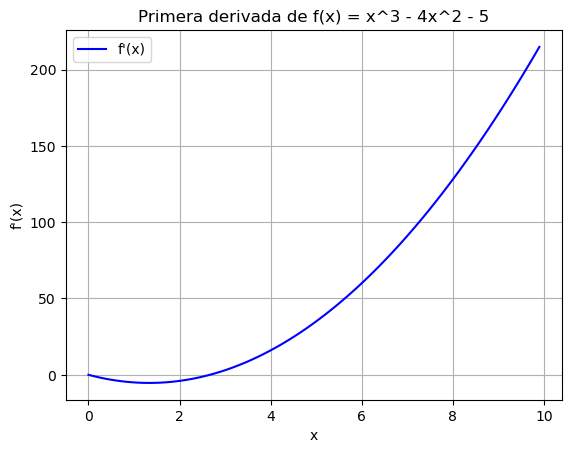

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def f(x): # Definimos la funcion ya derivada la cual vamos a graficar
    return x**3 - 4*x**2 - 5

def derivada_centrada(x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Definimos tanto el intervalos como el paso
x_values = np.arange(0, 10, 0.1)  # Intervalo de [0, 10] 
h = 0.1  # Paso que es 0.1

# Calcular la derivada centrada para cada valor de x en el intervalo
derivada_values = [derivada_centrada(x, h) for x in x_values]

# Graficar la derivada
plt.plot(x_values, derivada_values, label="f'(x)", color='blue')


plt.title("Primera derivada de f(x) = x^3 - 4x^2 - 5")   # Añadir título 
plt.xlabel("x") # y etiquetas tanto para el eje x como para el y
plt.ylabel("f'(x)")
plt.grid(True) # ponemos una cuadricula

plt.legend() # y la leyenda

#Mostramos la grafica
plt.show()


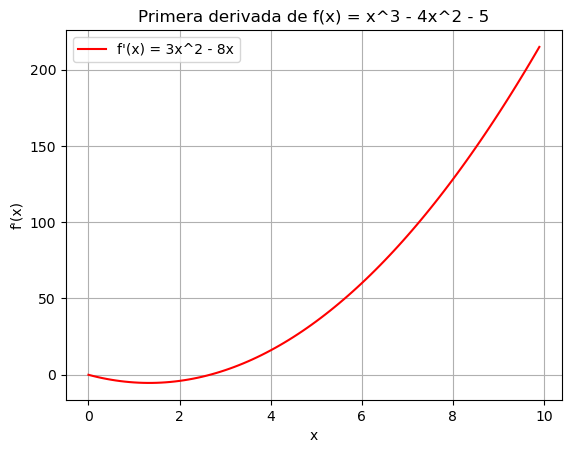

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def f_derivada(x): # Definimos la funcion ya derivada la cual vamos a graficar
    return 3*x**2 - 8*x

# Definir el intervalo
x_values = np.arange(0, 10, 0.1)  # Intervalo de [0, 10] con paso h=0.1

# Calcular la derivada analítica para cada valor de x
derivada_analitica_values = f_derivada(x_values)

# Graficar la derivada analítica
plt.plot(x_values, derivada_analitica_values, label="f'(x) = 3x^2 - 8x", color='red')

plt.title("Primera derivada de f(x) = x^3 - 4x^2 - 5")   # Añadir título 
plt.xlabel("x") # y etiquetas tanto para el eje x como para el y
plt.ylabel("f'(x)")
plt.grid(True) # ponemos una cuadricula

plt.legend() # y la leyenda


#Mostramos la grafica
plt.show()

### Metodo numerico integracion (f(a) + f(b))x(b-a)/2
### Regla del trapecio h/2*[f(x0) + 2f(x1) + 2f(x2) +...+ 2f(xn-1) + f(xn)],    apunte n=2 tres puntos
Ejemplo: Integral de x^3-4x^2+2x-10 en el intervalo (0,10), de forma analitica es -107/12 = -10,083

In [16]:
import numpy as np
#Aplicando el metodo del trapecio
def f5(x):
    return x**3-4*x**2+2*x-10
def integral1(x):
    return x**4/4-4*x**3/3+x**2-10*x
def trapecio(xf,xi,f,f2,n):
    h=(xf-xi)/n
    x_values = np.linspace(xi, xf, n + 1)
    y_values = f(x_values)
    sumatorio = np.sum(y_values[1:-1])
    error=f2(xf)-f2(xi)-h/2*(f(xi)+f(xf)+2*sumatorio)
    return "El resultado del metodo del trapecio es: ",h/2*(f(xi)+f(xf)+2*sumatorio), "Y el error es: ", error

print(trapecio(1,0,f5,integral1,2))

print(trapecio(1,0,f5,integral1,100))

('El resultado del metodo del trapecio es: ', -10.1875, 'Y el error es: ', 0.10416666666666607)
('El resultado del metodo del trapecio es: ', -10.083375000000002, 'Y el error es: ', 4.1666666668049857e-05)


In [17]:
def f(x):
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5
def f_integral(x):
    return 0.2*x + (25/2)*x**2 - (200/3)*x**3 + (675/4)*x**4 - (900/5)*x**5 + (400/6)*x**6



print(trapecio(0.8,0,f,f_integral,2))
print(trapecio(0.8,0,f,f_integral,5))
print(trapecio(0.8,0,f,f_integral,10))
print(trapecio(0.8,0,f,f_integral,20))

('El resultado del metodo del trapecio es: ', 1.0688000000000115, 'Y el error es: ', 0.5717333333333259)
('El resultado del metodo del trapecio es: ', 1.5398809600000132, 'Y el error es: ', 0.10065237333332422)
('El resultado del metodo del trapecio es: ', 1.615042560000011, 'Y el error es: ', 0.0254907733333265)
('El resultado del metodo del trapecio es: ', 1.6341401600000038, 'Y el error es: ', 0.006393173333333557)


Si tengo una función \( f \) en un intervalo \([a, b]\), su derivada existe, es continua, y su segunda derivada también existe. La expresión de la función es:

$$
f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{f''(\xi)}{2}(x - x_0)^2
$$

La ecuación diferencial es:

$$
\frac{dy}{dt} = f(y, t)
$$

Con la condición inicial:

$$
y(0) = y_0
$$

En el intervalo:

$$
a < t < b
$$

Los puntos tienen que ser equidistantes.


Sea la ecuación:

$$
y(t_{i+1}) = y(t_i) + y'(t_i)(t_{i+1} - t_i) + \frac{y''(\xi)}{2} (t_{i+1} - t_i)^2
$$

Y dado que:

$$
y'(t) = \frac{dy}{dt} = f(t, y)
$$

entonces:

$$
y(t_{i+1}) = y(t_i) + f(t_i, y(t_i))(t_{i+1} - t_i) + \frac{y''(\xi)}{2} (t_{i+1} - t_i)^2
$$



La ecuación es:

$$
y(t_{i+1}) = y(t_i) + f(t_i, y(t_i))(t_{i+1} - t_i) + \frac{y''(\xi)}{2}(t_{i+1} - t_i)^2
$$

Ahora, como \( t_{i+1} - t_i = h \) (puesto que los \( t_i \) fueron seleccionados de manera uniforme), tenemos:

$$
y(t_{i+1}) = y(t_i) + f(t_i, y(t_i))h + \frac{y''(\xi)}{2}h^2
$$

y por lo tanto:

$$
y(t_{i+1}) \approx y(t_i) + f(t_i, y(t_i))h
$$

Si se toma \( y(t_i) = y_i \), entonces:

$$
y_{i+1} \approx y_i + h f(t_i, y_i)
$$



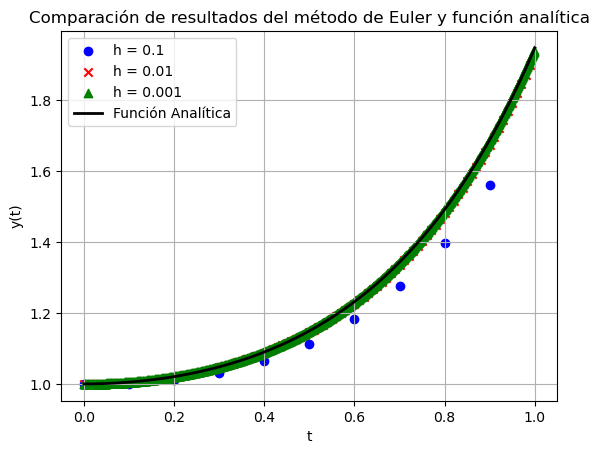

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def yPrima(x,t):
    return t*x+t**3

# Definimos la función analítica
def y_analitica(t):
    return 3 * np.exp((t**2) / 2) - t**2 - 2


def main(xf,xi,h,v_y0,y):
    listaPuntos=[]
    n=(xf-xi)/h
    valor_hasta_n =  0
    ti=-h
    y0 = v_y0
    while valor_hasta_n < n:
        valor_hasta_n +=1
        ti+=h
        
        punto=[ti,y0]
        listaPuntos.append(punto)
        y0=y0 + h*float(y(y0,ti))
    return listaPuntos



def graficar_puntos(puntos1, puntos2, puntos3):
    # Extraemos los valores de t (eje x) y y(t) (eje y) para cada conjunto de puntos
    x1_values = [punto[0] for punto in puntos1]
    y1_values = [punto[1] for punto in puntos1]
    
    x2_values = [punto[0] for punto in puntos2]
    y2_values = [punto[1] for punto in puntos2]
    
    x3_values = [punto[0] for punto in puntos3]
    y3_values = [punto[1] for punto in puntos3]

    # Graficamos cada conjunto de puntos con un color diferente
    plt.scatter(x1_values, y1_values, color='blue', label='h = 0.1', marker='o')
    plt.scatter(x2_values, y2_values, color='red', label='h = 0.01', marker='x')
    plt.scatter(x3_values, y3_values, color='green', label='h = 0.001', marker='^')
    
    # Generar la curva analítica
    t_values = np.linspace(0, 1, 100)  # Rango de t para la función analítica
    y_values_analitica = [y_analitica(t) for t in t_values]

    # Graficar la función analítica
    plt.plot(t_values, y_values_analitica, color='black', label='Función Analítica', linewidth=2)

    # Configuramos etiquetas y título del gráfico
    plt.title("Comparación de resultados del método de Euler y función analítica")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    
    # Mostramos la leyenda y el gráfico
    plt.legend()
    plt.grid(True)
    plt.show()

# Generamos los puntos con diferentes pasos h
puntos1 = main(1, 0, 0.1, 1, yPrima)   # h = 0.1
puntos2 = main(1, 0, 0.01, 1, yPrima)  # h = 0.01
puntos3 = main(1, 0, 0.001, 1, yPrima) # h = 0.001

# Llamamos a la función de graficar
graficar_puntos(puntos1, puntos2, puntos3)

# MÉTODO DE HEUN

**Es un método predictor-corrector.**

Las dos derivadas que se calculan en el método de Euler para predecir la pendiente se promedian después, con la finalidad de obtener una mejor estimación de la pendiente en todo el intervalo.

Primero se predice el punto \(y_{i+1}\) con el método de Euler:

\[
y_{i+1}^0 = y_i + f(x_i, y_i) h
\]

Seguidamente se corrige el valor promediando el valor de la derivada de la función con el valor de la derivada del valor calculado anteriormente:

\[
y_{i+1} = y_i + \frac{f(x_i, y_i) + f(x_{i+1}, y_{i+1}^0)}{2} h
\]


In [19]:
import matplotlib.pyplot as plt
import numpy as np

def solucion_analitica(t):
    return (4 / 1.3) * (np.exp(0.8 * t) - np.exp(-0.5 * t)) + 2 * np.exp(-0.5 * t)

def main(xf, xi, h, v_y0, f):
    listaPuntos_t = []  
    listaPuntos_y = [] 
    n = (xf - xi) / h
    valor_hasta_n = 0
    ti = -h
    yi = v_y0

    while valor_hasta_n < n:
        valor_hasta_n += 1
        ti += h
        listaPuntos_t.append(ti)

        yi_ = yi + f(ti, yi)
        yi = yi + h * (f(xi, yi) + f(ti + h, yi_)) / 2
        xi += h
        listaPuntos_y.append(yi)

    return listaPuntos_t, listaPuntos_y

# Parámetros
xf = 4
xi = 0
v_y0 = 2

# Valores de h
h_1 = 0.001
h_2 = 0.01
h_3 = 0.1

# Solución con h = 0.001
t_heun_1, y_heun_1 = main(xf, xi, h_1, v_y0, funcion)

# Solución con h = 0.01
t_heun_2, y_heun_2 = main(xf, xi, h_2, v_y0, funcion)

t_heun_3, y_heun_3= main(xf, xi, h_3,v_y0, funcion)

# Solución analítica
t_analitica = np.linspace(xi, xf, 100)
y_analitica = solucion_analitica(t_analitica)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(t_heun_1, y_heun_1, 'bo-', label='Heun h=0.001', markersize=3)
plt.plot(t_heun_2, y_heun_2, 'yo-', label='Heun h=0.01', markersize=3)
plt.plot(t_heun_3,y_heun_3 ,'go-', label='Heun h=0,1', markersize=3)
plt.plot(t_analitica, y_analitica, 'r--', label='Solución Analítica', linewidth=2)

# Etiquetas del gráfico
plt.title("Método de Heun vs. Solución Analítica para diferentes valores de h")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'funcion' is not defined

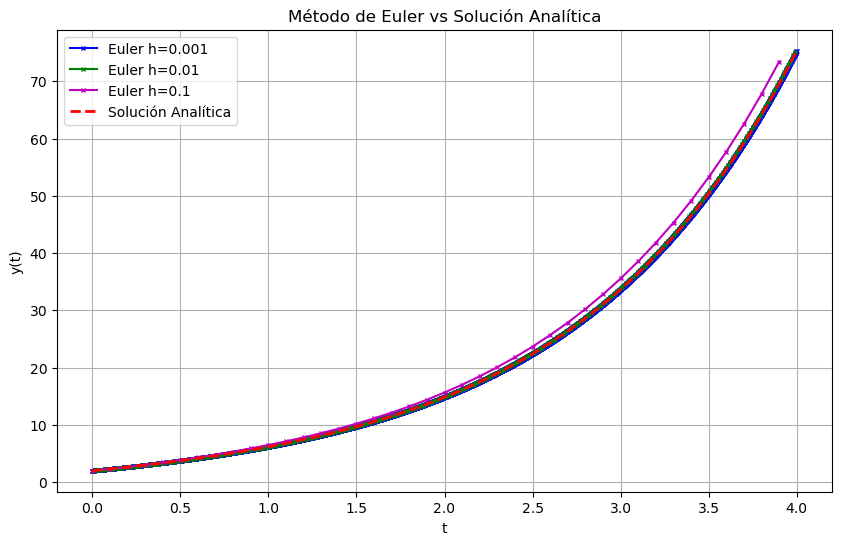

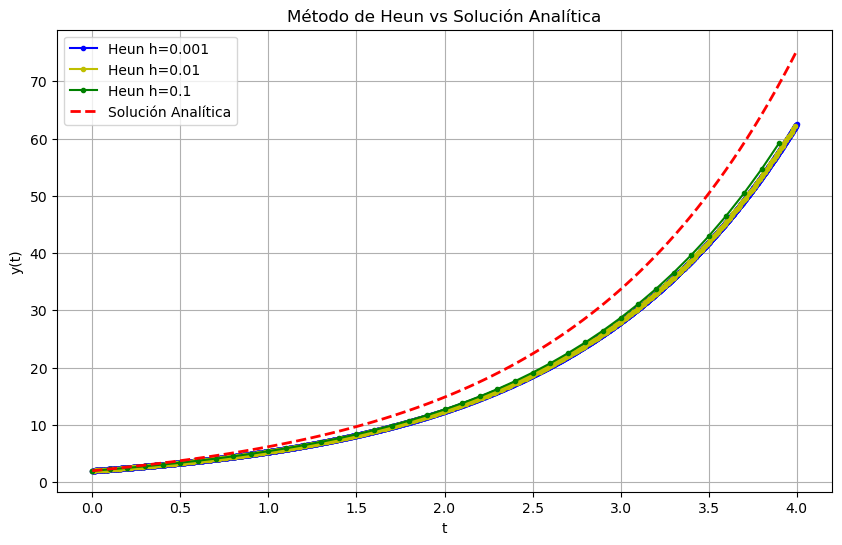

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Función de la ecuación diferencial dada: dy/dt = 4*e^(0.8t) - 0.5*y
def funcion(t, y):
    return 4 * np.exp(0.8 * t) - 0.5 * y

# Solución analítica
def solucion_analitica(t):
    return (4 / 1.3) * (np.exp(0.8 * t) - np.exp(-0.5 * t)) + 2 * np.exp(-0.5 * t)

# Método de Heun (trapezoidal)
def heun_method(xf, xi, h, v_y0, f):
    listaPuntos_t = []  
    listaPuntos_y = [] 
    n = int((xf - xi) / h)
    ti = xi
    yi = v_y0

    for _ in range(n):
        listaPuntos_t.append(ti)
        listaPuntos_y.append(yi)
        
        yi_ = yi + f(ti, yi)  # Predicción de Euler
        yi = yi + h * (f(ti, yi) + f(ti + h, yi_)) / 2  # Corrección trapezoidal
        ti += h
       

    return listaPuntos_t, listaPuntos_y

# Método de Euler
def euler_method(xf, xi, h, v_y0, f):
    listaPuntos_t = []
    listaPuntos_y = []
    ti = xi
    yi = v_y0
    n = int((xf - xi) / h)

    for _ in range(n):
        listaPuntos_t.append(ti)
        listaPuntos_y.append(yi)
        ti += h
        yi = yi + h * f(ti, yi)  # Método de Euler (y = y + h*f(t,y))
        

    return listaPuntos_t, listaPuntos_y

# Parámetros
xf = 4
xi = 0
v_y0 = 2

# Valores de h
h_1 = 0.001
h_2 = 0.01
h_3 = 0.1

# Soluciones con Heun para diferentes valores de h
t_heun_1, y_heun_1 = heun_method(xf, xi, h_1, v_y0, funcion)
t_heun_2, y_heun_2 = heun_method(xf, xi, h_2, v_y0, funcion)
t_heun_3, y_heun_3 = heun_method(xf, xi, h_3, v_y0, funcion)

# Soluciones con Euler para diferentes valores de h
t_euler_1, y_euler_1 = euler_method(xf, xi, h_1, v_y0, funcion)
t_euler_2, y_euler_2 = euler_method(xf, xi, h_2, v_y0, funcion)
t_euler_3, y_euler_3 = euler_method(xf, xi, h_3, v_y0, funcion)

# Solución analítica
t_analitica = np.linspace(xi, xf, 100)
y_analitica = solucion_analitica(t_analitica)

# Gráfica 1: Comparación Método de Euler vs Solución Analítica
plt.figure(figsize=(10, 6))
plt.plot(t_euler_1, y_euler_1, 'bx-', label='Euler h=0.001', markersize=3)
plt.plot(t_euler_2, y_euler_2, 'gx-', label='Euler h=0.01', markersize=3)
plt.plot(t_euler_3, y_euler_3, 'mx-', label='Euler h=0.1', markersize=3)
plt.plot(t_analitica, y_analitica, 'r--', label='Solución Analítica', linewidth=2)

# Etiquetas y leyenda para la primera gráfica
plt.title("Método de Euler vs Solución Analítica")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica 2: Comparación Método de Heun vs Solución Analítica
plt.figure(figsize=(10, 6))
plt.plot(t_heun_1, y_heun_1, 'bo-', label='Heun h=0.001', markersize=3)
plt.plot(t_heun_2, y_heun_2, 'yo-', label='Heun h=0.01', markersize=3)
plt.plot(t_heun_3, y_heun_3, 'go-', label='Heun h=0.1', markersize=3)
plt.plot(t_analitica, y_analitica, 'r--', label='Solución Analítica', linewidth=2)

# Etiquetas y leyenda para la segunda gráfica
plt.title("Método de Heun vs Solución Analítica")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()



([0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001, 2.9000000000000012, 3.0000000000000013, 3.1000000000000014, 3.2000000000000015, 3.3000000000000016, 3.4000000000000017, 3.5000000000000018, 3.600000000000002, 3.700000000000002, 3.800000000000002, 3.900000000000002, 4.000000000000002], [2, 2.308790110866201, 2.636362489989641, 2.9846197278975035, 3.355606378657868, 3.7515215882063524, 4.1747327352082655, 4.627790170701182, 5.113443149852597, 5.6346570568521, 6.194632032286673, 6.796823121374709, 7.444962071217061, 8.143080915824708, 8.895537499170336, 9.707043098959002, 10.582692327300927, 11.5279954990

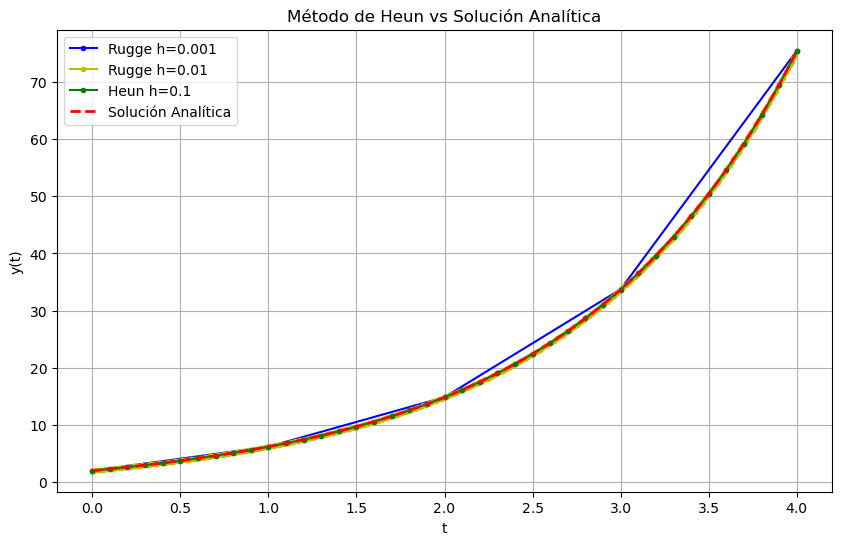

In [21]:
def solucion_analitica(t):
    return (4 / 1.3) * (np.exp(0.8 * t) - np.exp(-0.5 * t)) + 2 * np.exp(-0.5 * t)

def f(t, y):
    return 4 * np.exp(0.8 * t) - 0.5 * y

def heun_method(xf, xi, h, v_y0, f):
    listaPuntos_t = [xi]  
    listaPuntos_y = [v_y0] 
    n = int((xf - xi) / h)
    ti = xi
    yi = v_y0

    for _ in range(n):
        
        k1=f(ti,yi)
        k2=f(ti+h/2,yi+k1*h/2)
        k3=f(ti+h/2,yi+k2*h/2)
        k4=f(ti+h,yi+k3*h)
       
        yi = yi+h*(k1+2*(k2+k3)+k4)/6# Corrección trapezoidal
        ti += h
        listaPuntos_t.append(ti)
        listaPuntos_y.append(yi)

    return listaPuntos_t, listaPuntos_y


# Parámetros
xf = 4  # Intervalo final
xi = 0    # Intervalo inicial
v_y0 = 2  # Valor inicial y(0)

h_1 = 1
h_2 = 0.01
h_3 = 0.1

print(heun_method(4,0,0.1,2,f))

t_heun_1, y_heun_1 = heun_method(xf, xi, h_1, v_y0, f)
t_heun_2, y_heun_2 = heun_method(xf, xi, h_2, v_y0, f)
t_heun_3, y_heun_3 = heun_method(xf, xi, h_3, v_y0, f)  


# Solución analítica
t_analitica = np.linspace(xi, xf, 100)
y_analitica = solucion_analitica(t_analitica)


# Gráfica 2: Comparación Método de Heun vs Solución Analítica
plt.figure(figsize=(10, 6))
plt.plot(t_heun_1, y_heun_1, 'bo-', label='Rugge h=0.001', markersize=3)
plt.plot(t_heun_2, y_heun_2, 'yo-', label='Rugge h=0.01', markersize=3)
plt.plot(t_heun_3, y_heun_3, 'go-', label='Heun h=0.1', markersize=3)
plt.plot(t_analitica, y_analitica, 'r--', label='Solución Analítica', linewidth=2)

# Etiquetas y leyenda para la segunda gráfica
plt.title("Método de Heun vs Solución Analítica")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()


Malthus: P: dp/dt=rp
r = tasa de crecimiento+
Una poblacion de 100 bacterias se cultivan en medio con tasa de crecimiento de 0,01 bacterias hora
Calcule el numero de bacterias pasado un dia mediante el metodo de euler con N=2

En este caso h = (24-0)/2 = 12
y0 = 100
f(t,y) = 0,01y


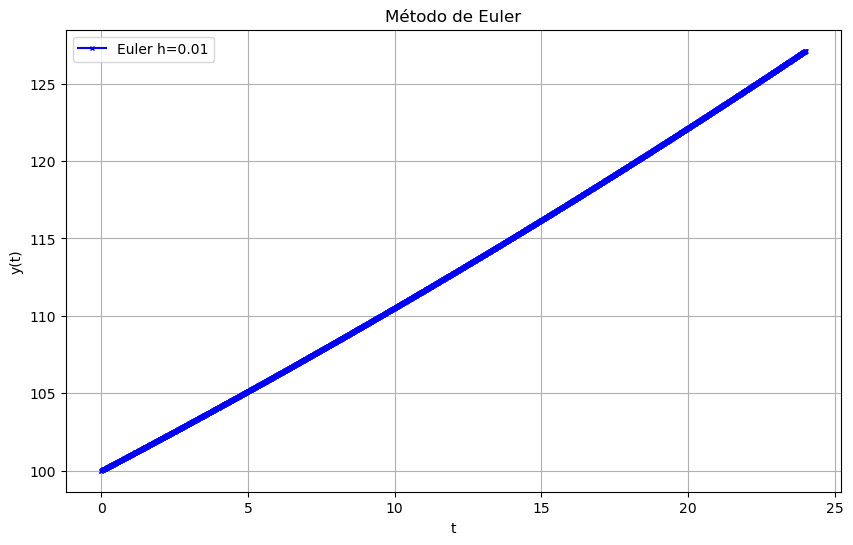

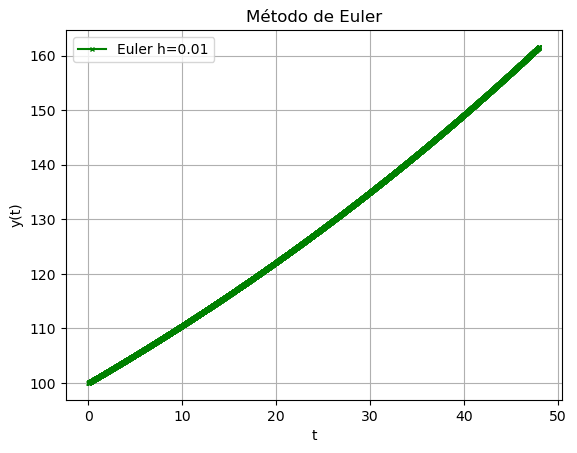

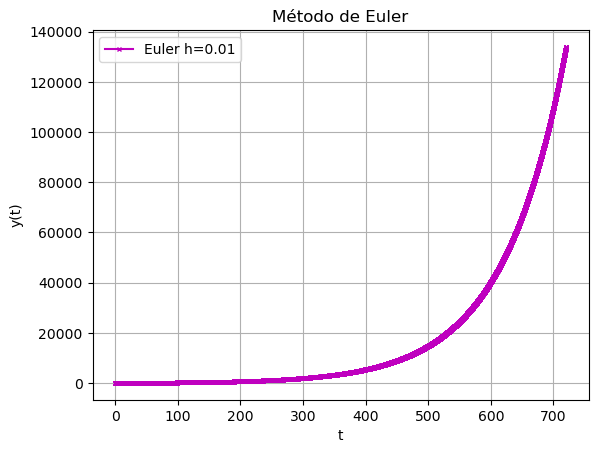

In [23]:
def fy(t,y):
    return 0.01*y
def euler_method(xf, xi, h, v_y0, f):
    listaPuntos_t = []
    listaPuntos_y = []
    ti = xi
    yi = v_y0
    n = int((xf - xi) / h)+1

    for _ in range(n):
        listaPuntos_t.append(ti)
        listaPuntos_y.append(yi)
        ti += h
        yi = yi + h * f(ti, yi)  # Método de Euler (y = y + h*f(t,y))
        

    return listaPuntos_t, listaPuntos_y

t_euler_1, y_euler_1 = euler_method(24, 0, 0.01, 100, fy)
t_euler_2, y_euler_2 = euler_method(48, 0, 0.01, 100, fy)
t_euler_3, y_euler_3 = euler_method(720, 0, 0.01, 100, fy)


# Gráfica 1: Comparación Método de Euler vs Solución Analítica
plt.figure(figsize=(10, 6))
plt.plot(t_euler_1, y_euler_1, 'bx-', label='Euler h=0.01', markersize=3)

# Etiquetas y leyenda para la primera gráfica
plt.title("Método de Euler")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()


plt.plot(t_euler_2, y_euler_2, 'gx-', label='Euler h=0.01', markersize=3)
# Etiquetas y leyenda para la primera gráfica
plt.title("Método de Euler")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(t_euler_3, y_euler_3, 'mx-', label='Euler h=0.01', markersize=3)
# Etiquetas y leyenda para la primera gráfica
plt.title("Método de Euler")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()

dp/dt = rp-mp^2
r tasa de crecimiento
m tasa de mortalidad o capacidad del entorno
1000 individuos de una especie que tiene una tasa de crecimiento 0.05 individuos/dia y
tasa de mortalidad de 0.025   1/(dia*individuo)
determine pasado un mes

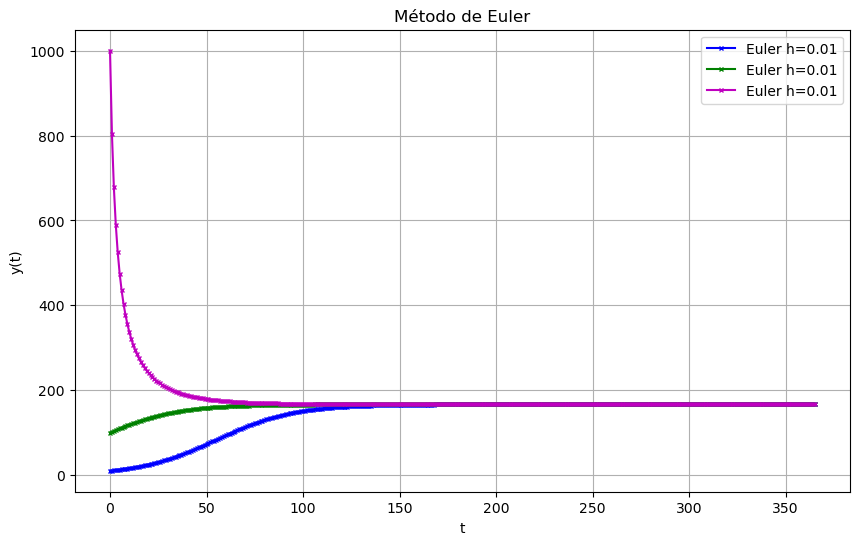

In [34]:
def fv(t,y):
    return 0.05*y - 0.0003*y**2

def Runge_method(xf, xi, h, v_y0, f):
    listaPuntos_t = [xi]  
    listaPuntos_y = [v_y0] 
    n = int((xf - xi) / h)
    ti = xi
    yi = v_y0

    for _ in range(n):
        
        k1=f(ti,yi)
        k2=f(ti+h/2,yi+k1*h/2)
        k3=f(ti+h/2,yi+k2*h/2)
        k4=f(ti+h,yi+k3*h)
       
        yi = yi+h*(k1+2*(k2+k3)+k4)/6# Corrección trapezoidal
        ti += h
        listaPuntos_t.append(ti)
        listaPuntos_y.append(yi)

    return listaPuntos_t, listaPuntos_y



t_euler_1, y_euler_1 = Runge_method(365, 0, 1, 10, fv)
t_euler_2, y_euler_2 = Runge_method(365, 0, 1, 100, fv)
t_euler_3, y_euler_3 = Runge_method(365, 0, 1, 1000, fv)

# Gráfica 1: Comparación Método de Euler vs Solución Analítica
plt.figure(figsize=(10, 6))
plt.plot(t_euler_1, y_euler_1, 'bx-', label='Euler h=0.01', markersize=3)



plt.plot(t_euler_2, y_euler_2, 'gx-', label='Euler h=0.01', markersize=3)


plt.plot(t_euler_3, y_euler_3, 'mx-', label='Euler h=0.01', markersize=3)
# Etiquetas y leyenda para la primera gráfica
plt.title("Método de Euler")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()

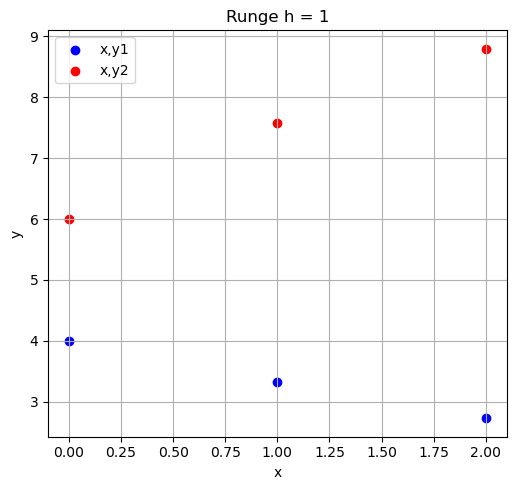

In [55]:
def f1(t,y1,y2):
    return -0.5*y1
def f2(t,y1,y2):
    return 4-0.1*y1-0.3*y2


def Runge_method_sistema(xf, xi, h, y10,y20, f1,f2):
    listaPuntos_t1 = [xi]  
    listaPuntos_y1 = [y10] 
    listaPuntos_y2 = [y20]
    n = int((xf - xi) / h)
    ti = xi
    y1 = y10
    y2 = y20

    for _ in range(n):
        
        k11=f1(ti,y1,y2)
        k12=f2(ti,y1,y2)
        
        k21=f2(ti+h/2,y1+k11*h/2,y2+h/2*k12)
        k22=f2(ti+h/2,y1+k11*h/2,y2+h/2*k12)
        
        k13=f1(ti+h/2,y1+k12*h/2,y2+h/2*k22)
        k23=f2(ti+h/2,y1+k12*h/2,y2+h/2*k22)
        
        k14=f1(ti+h,y1+k13*h,y2+k23*h)
        k24=f2(ti+h,y1+k13*h,y2+k23*h)
        
       
        y1 = y1+h*(k11+2*(k12+k13)+k14)/6
        y2 = y2+h*(k21+2*(k22+k23)+k24)/6
        
        ti += h
        
        listaPuntos_t1.append(ti)
        listaPuntos_y1.append(y1)
        listaPuntos_y2.append(y2)

    return listaPuntos_t1, listaPuntos_y1, listaPuntos_y2

t1, y1, y2 = Runge_method_sistema(2, 0, 1, 4, 6, f1, f2)


plt.figure(figsize=(10, 5)) 

# Gráfico de dispersión t1 vs y1
plt.subplot(1, 2, 1)  # Crear la primera gráfica en una figura 1x2
plt.scatter(t1, y1, color='blue', label='x,y1')
plt.scatter(t1, y2, color='red', label='x,y2')
plt.title('Runge h = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

# Mostrar las dos gráficas
plt.tight_layout()
plt.show()


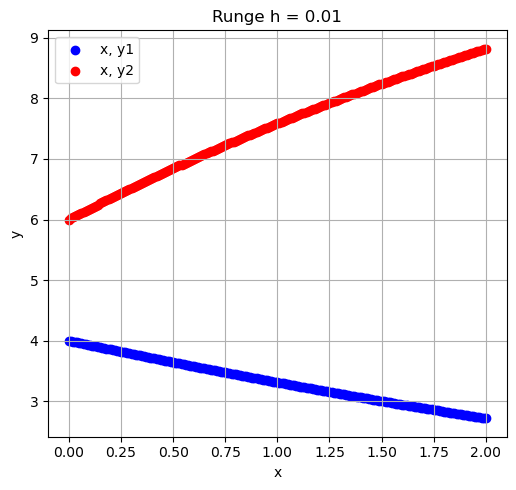

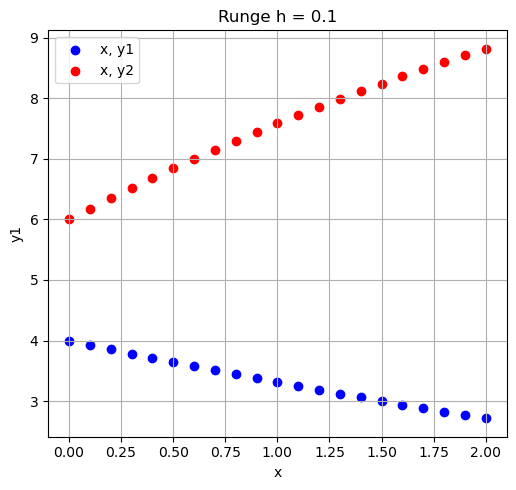

In [54]:
plt.figure(figsize=(10, 5)) 

t1, y1, y2 = Runge_method_sistema(2, 0, 0.01, 4, 6, f1, f2)

plt.subplot(1, 2, 1)  # Crear la primera gráfica en una figura 1x2
plt.scatter(t1, y1, color='blue', label='x, y1')
plt.scatter(t1, y2, color='red', label='x, y2')
plt.title('Runge h = 0.01')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()


# Mostrar las dos gráficas
plt.tight_layout()
plt.show()

t1, y1, y2 = Runge_method_sistema(2, 0, 0.1, 4, 6, f1, f2)
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1)  # Crear la primera gráfica en una figura 1x2
plt.scatter(t1, y1, color='blue', label='x, y1')
plt.scatter(t1, y2, color='red', label='x, y2')
plt.title('Runge h = 0.1')
plt.xlabel('x')
plt.ylabel('y1')
plt.grid(True)
plt.legend()


# Mostrar las dos gráficas
plt.tight_layout()
plt.show()


y, y1=y, y2 =y1'=y', y3=y2'=y1''=y'',y3'=y2''=y1'''=y'''

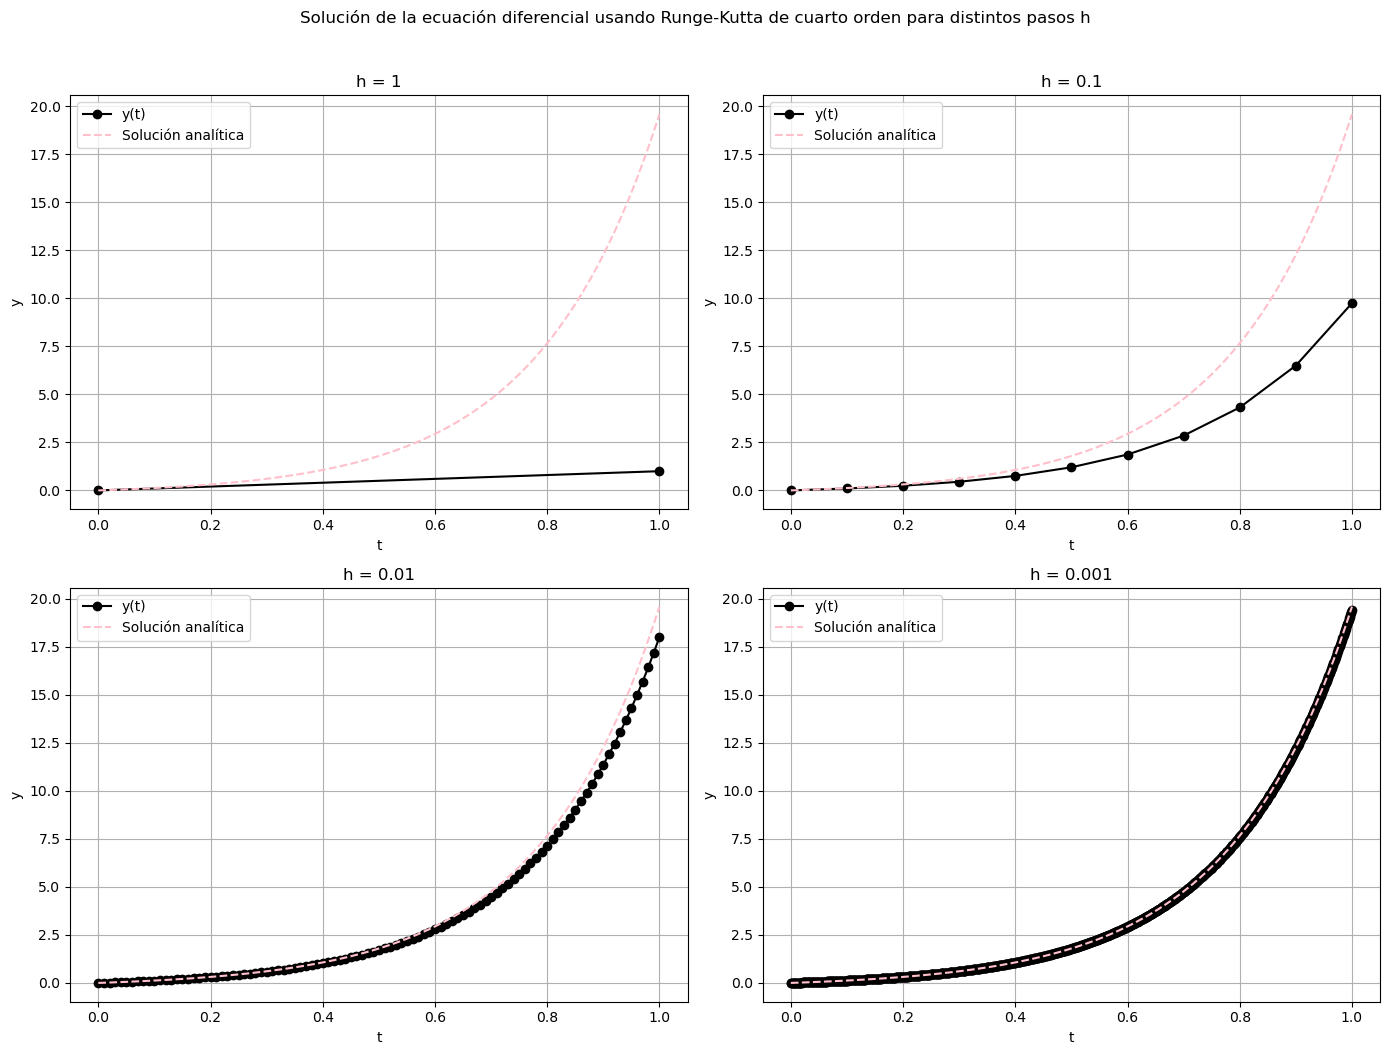

In [99]:
import numpy as np
import matplotlib.pyplot as plt

def solucion_analitica(t):
    C1 = 1 / (2 * np.sqrt(7))
    C2 = -1 / (2 * np.sqrt(7))
    return C1 * np.exp((2 + np.sqrt(7)) * t) + C2 * np.exp((2 - np.sqrt(7)) * t)

# Valores de tiempo para la solución analítica
t_analitico = np.linspace(0, 1, 100)
y_analitico = solucion_analitica(t_analitico)

# Funciones para el sistema convertido a primer orden
def funcion_y1Prima(t, y1, y2):
    return y2

def funcion_y2Prima(t, y1, y2):
    return 4 * y2 + 3 * y1


def euler_method(xf, xi, h, y10, y20, f1, f2):
    t_values = [xi]
    y1_values = [y10]
    y2_values = [y20]
    
    n = int((xf - xi) / h)
    ti = xi
    y1 = y10
    y2 = y20
    

    for _ in range(n):
        ti += h
        y1 = y1 + h * f1(ti, y1,y2)
        y2 = y2 + h * f2(ti, y1,y2)
        
        
        t_values.append(ti)
        y1_values.append(y1)
        y2_values.append(y2)
      
    return t_values,y1_values,y2_values

xi = 0
xf = 1
y10 = 0
y20 = 1
h_values = [1, 0.1, 0.01, 0.001]

# Graficar resultados para cada valor de h
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for idx, h in enumerate(h_values):
    t, y1, y2 = euler_method(xf, xi, h, y10, y20, funcion_y1Prima, funcion_y2Prima)
    
    ax = axs[idx // 2, idx % 2]
    ax.plot(t, y1, label='y(t)', color='black', marker='o')
    ax.plot(t_analitico, y_analitico, label='Solución analítica', color='pink', linestyle='--')
    ax.set_title(f"h = {h}")
    ax.set_xlabel("t")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid()

# Ajustar el layout
plt.tight_layout()
plt.suptitle("Solución de la ecuación diferencial usando Runge-Kutta de cuarto orden para distintos pasos h", y=1.05)
plt.show()

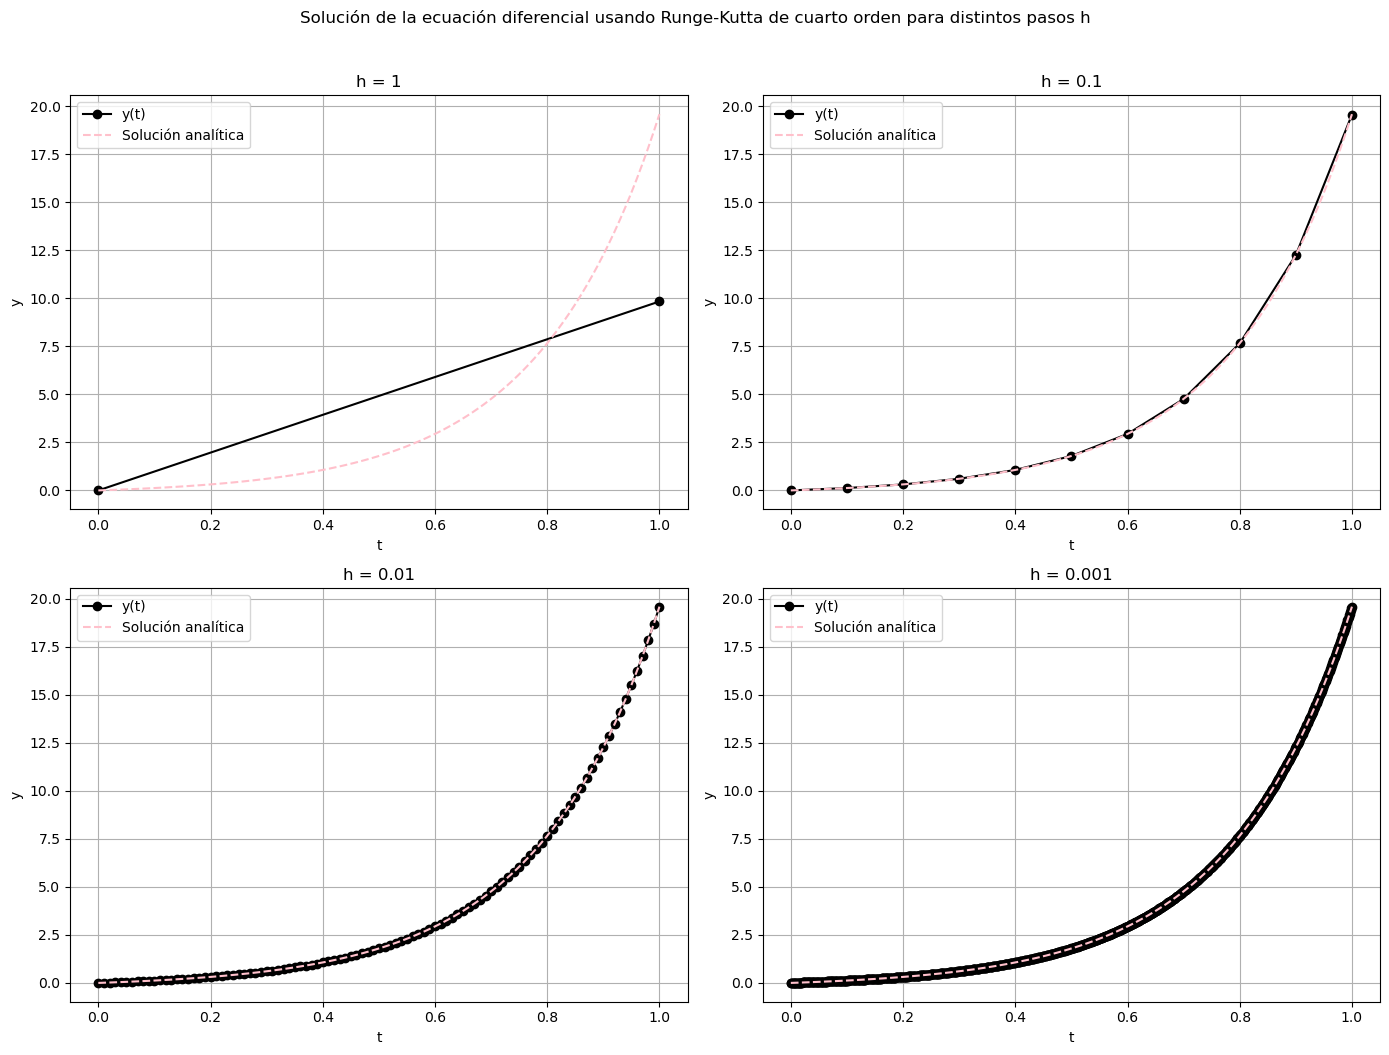

In [5]:
#en este caso y''=4y'+3y  ==>>  y3=4y2+2y1
#tambien como y'(0)=1  ==>>  y1'=y2=1
#tambien y1=y=0

import numpy as np
import matplotlib.pyplot as plt

def solucion_analitica(t):
    C1 = 1 / (2 * np.sqrt(7))
    C2 = -1 / (2 * np.sqrt(7))
    return C1 * np.exp((2 + np.sqrt(7)) * t) + C2 * np.exp((2 - np.sqrt(7)) * t)

# Valores de tiempo para la solución analítica
t_analitico = np.linspace(0, 1, 100)
y_analitico = solucion_analitica(t_analitico)

# Funciones para el sistema convertido a primer orden
def funcion_y1Prima(t, y1, y2):
    return y2

def funcion_y2Prima(t, y1, y2):
    return 4 * y2 + 3 * y1

# Método de Runge-Kutta de cuarto orden para resolver el sistema
def runge_kutta_sistema(xf, xi, h, y10, y20, f1, f2):
    t_values = [xi]
    y1_values = [y10]
    y2_values = [y20]

    n = int((xf - xi) / h)
    ti = xi
    y1 = y10
    y2 = y20

    for _ in range(n):
        # Calcular los valores k para y1 y y2
        k1_1 = h * f1(ti, y1, y2)
        k1_2 = h * f2(ti, y1, y2)

        k2_1 = h * f1(ti + h / 2, y1 + k1_1 / 2, y2 + k1_2 / 2)
        k2_2 = h * f2(ti + h / 2, y1 + k1_1 / 2, y2 + k1_2 / 2)

        k3_1 = h * f1(ti + h / 2, y1 + k2_1 / 2, y2 + k2_2 / 2)
        k3_2 = h * f2(ti + h / 2, y1 + k2_1 / 2, y2 + k2_2 / 2)

        k4_1 = h * f1(ti + h, y1 + k3_1, y2 + k3_2)
        k4_2 = h * f2(ti + h, y1 + k3_1, y2 + k3_2)

        # Actualizar y1 y y2
        y1 += (k1_1 + 2 * k2_1 + 2 * k3_1 + k4_1) / 6
        y2 += (k1_2 + 2 * k2_2 + 2 * k3_2 + k4_2) / 6
        ti += h

        # Almacenar los valores
        t_values.append(ti)
        y1_values.append(y1)
        y2_values.append(y2)

    return t_values, y1_values, y2_values

# Condiciones iniciales y parámetros del problema
xi = 0
xf = 1
y10 = 0
y20 = 1
h_values = [1, 0.1, 0.01, 0.001]

# Graficar resultados para cada valor de h
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for idx, h in enumerate(h_values):
    t, y1, y2 = runge_kutta_sistema(xf, xi, h, y10, y20, funcion_y1Prima, funcion_y2Prima)
    
    ax = axs[idx // 2, idx % 2]
    ax.plot(t, y1, label='y(t)', color='black', marker='o')
    ax.plot(t_analitico, y_analitico, label='Solución analítica', color='pink', linestyle='--')
    ax.set_title(f"h = {h}")
    ax.set_xlabel("t")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid()

# Ajustar el layout
plt.tight_layout()
plt.suptitle("Solución de la ecuación diferencial usando Runge-Kutta de cuarto orden para distintos pasos h", y=1.05)
plt.show()


1. Realice un programa que resuelva la siguiente ecuación diferencial por el método de Euler:

   $$ y'''' + 6y''' + 15y'' + 20y' + 12y = 0 $$

   Tome como condiciones iniciales $$ y(0) = 1 ;  y'(0) = 0 ;  y''(0) = 1  ;  y'''(0) = 0 $$.
   
   Tome tres valores diferentes de \( h \) (0.5, 0.1 y 0.01) para el intervalo entre \( t \in [0, 1] \).
   
   Compare sus resultados con la solución analítica.
Por lo que y'=y2=0, y''=y3=1,y'''=y4=0,y''''=y5

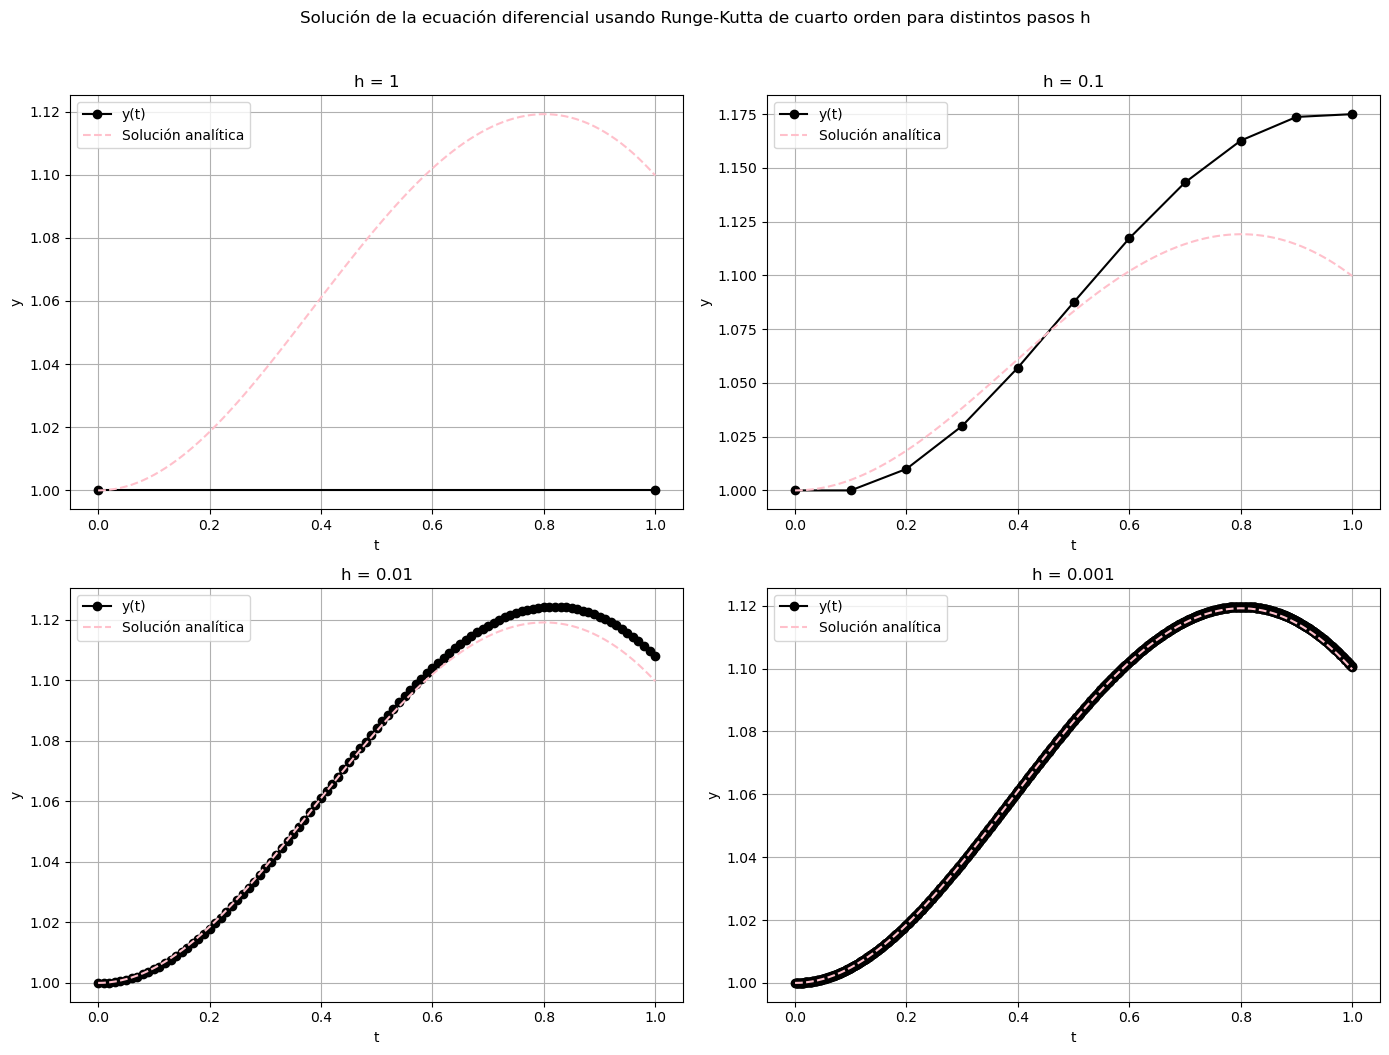

In [121]:
 def funcion_y4_prima(ti,y1,y2,y3,y4):
    return -6*y4-15*y3-20*y2-12*y1
def funcion_y3_prima(ti,y1,y2,y3,y4):
    return y4
def funcion_y2_prima(ti,y1,y2,y3,y4):
    return y3
def funcion_y1_prima(ti,y1,y2,y3,y4):
    return y2

def solucion_analitica(x):
    term1 = (11 * np.sin(np.sqrt(2) * x) / (9 * np.sqrt(2)) - 23 * np.cos(np.sqrt(2) * x) / 9) / np.exp(x)
    term2 = (-10 * x / 3 - 32 / 9) / np.exp(2 * x)
    return term1 - term2

t_analitico = np.linspace(0, 1, 100)
y_analitico = solucion_analitica(t_analitico)

def euler_method(xf, xi, h, y10, y20, y30, y40, f1, f2, f3, f4):
    t_values = [xi]
    y1_values = [y10]
    y2_values = [y20]
    y3_values = [y30]
    y4_values = [y40]
    
    n = int((xf - xi) / h)
    ti = xi
    y1,y2,y3,y4 = y10,y20,y30,y40

    for _ in range(n):
        ti += h
        y1 += h * f1(ti, y1,y2,y3,y4)
        y2 += h * f2(ti, y1,y2,y3,y4)
        y3 += h * f3(ti, y1,y2,y3,y4)
        y4 += h * f4(ti, y1,y2,y3,y4)
        
        
        t_values.append(ti)
        y1_values.append(y1)
        y2_values.append(y2)
        y3_values.append(y3)
        y4_values.append(y4)
    return t_values,y1_values,y2_values,y3_values,y4_values
xi = 0
xf = 1
y10 = 1
y20 = 0
y30 = 1
y40 = 0

h_values = [1, 0.1, 0.01, 0.001]

# Graficar resultados para cada valor de h
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for idx, h in enumerate(h_values):
    t, y1, y2, y3, y4 = euler_method(xf, xi, h, y10, y20, y30, y40, funcion_y1_prima, funcion_y2_prima,funcion_y3_prima,funcion_y4_prima)
    
    ax = axs[idx // 2, idx % 2]
    ax.plot(t, y1, label='y(t)', color='black', marker='o')
    ax.plot(t_analitico, y_analitico, label='Solución analítica', color='pink', linestyle='--')

    ax.set_title(f"h = {h}")
    ax.set_xlabel("t")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid()

# Ajustar el layout
plt.tight_layout()
plt.suptitle("Solución de la ecuación diferencial usando Runge-Kutta de cuarto orden para distintos pasos h", y=1.05)
plt.show()

Dado que tenemos una ecuación de la forma $y'' = F(y)$, con $F$ dependiente solo de $y$ (no de $t$ o $y'$), se puede usar el **método de Verlet** para aproximar la solución.

### Ejemplo

Considerando la ecuación de la segunda ley de Newton:
$$
F = m \cdot a = m \cdot \frac{d^2 r}{dt^2}
$$

donde $F(y)$ representa una fuerza dependiente de la posición $y$ únicamente.

Para aproximar $f(x)$ en un punto próximo $x_0 + \Delta x$, aplicamos la fórmula de Verlet:
$$
f(x_0 + \Delta x) = 2 f(x_0) - f(x_0 - \Delta x) + f''(x_0) \, (\Delta x)^2
$$

En esta expresión:
- $f(x_0 + \Delta x)$ es el valor aproximado de la función en el punto $x_0 + \Delta x$,
- $f(x_0)$ es el valor de la función en el punto actual $x_0$,
- $f(x_0 - \Delta x)$ es el valor en el punto anterior,
- $f''(x_0)$ es la derivada segunda de $f$ en el punto $x_0$,
- $(\Delta x)^2$ es el cuadrado del paso de avance.


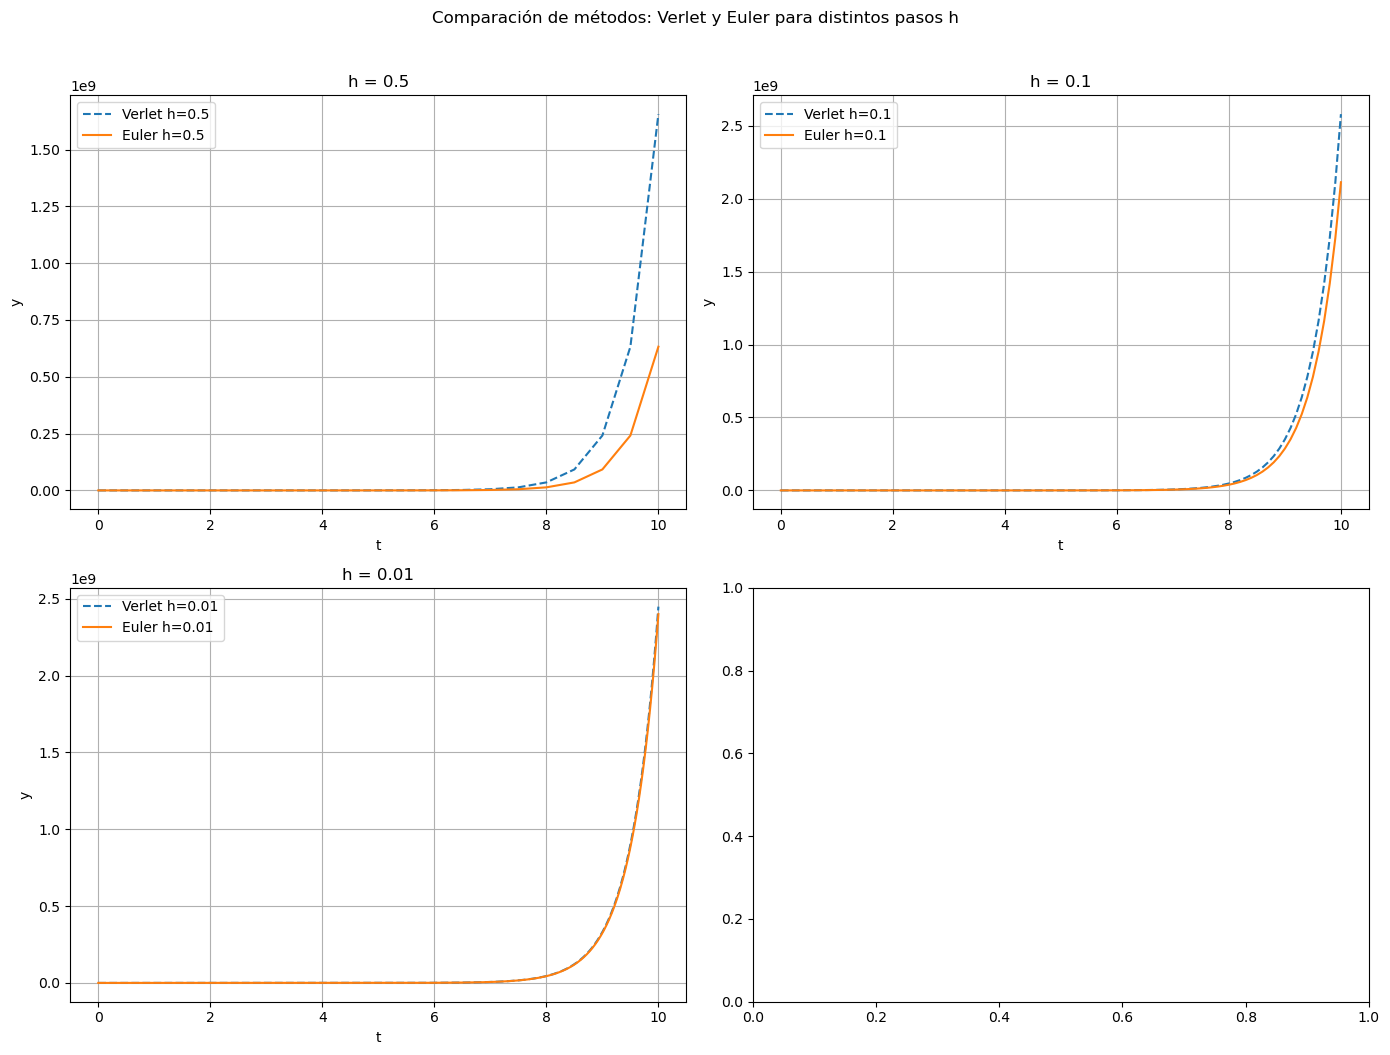

In [18]:
#Metodo verlet y(i-1)=y0-y0'h+1/2y0''h^2
# y(i+1)=2yi-y(i-1)+yi''h^2
def funcion_y1Prima(t, y1, y2):
    return y2

def funcion_y2Prima(t, y1, y2):
    return 4*y1+np.exp(-2*y1)


def euler_method(xf, xi, h, y10, y20, f1, f2):
    t_values = [xi]
    y1_values = [y10]
    y2_values = [y20]
    
    n = int((xf - xi) / h)
    ti = xi
    y1 = y10
    y2 = y20
    

    for _ in range(n):
        ti += h
        y1 = y1 + h * f1(ti, y1,y2)
        y2 = y2 + h * f2(ti, y1,y2)
        
        
        t_values.append(ti)
        y1_values.append(y1)
        y2_values.append(y2)
      
    return t_values,y1_values

def verlet(xf, xi, h, y10, y20, f1, f2):
    t_values = [xi]
    y1_values = [y10]
    y2_values = [y20]
    n= int((xf-xi)/h)
           
    ti,y1,y2 = xi,y10,y20
    
    ymenos1 = y1 -y2 * h+ 1/2 * h**2 * f1(ti,y1,y2)
    for _ in range(n):
        # Calcula y(i+1) usando el método de Verlet
        ymas1 = 2 * y1 - ymenos1 + h**2 * f2(ti, y1, y2)
        
        # Actualizar tiempo y almacenar valores
        ti += h
        t_values.append(ti)
        y1_values.append(ymas1)
        
        # Actualizar para el siguiente paso
        ymenos1 = y1
        y1 = ymas1
    
    return t_values, y1_values
            
# Parámetros iniciales
xi = 0      # tiempo inicial
xf = 10     # tiempo final
y10 = 10    # y(0) = 10
y20 = 0     # y'(0) = 0
h_values = [0.5, 0.1, 0.01]


# Configuración de subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for idx, h in enumerate(h_values):
    ax = axs[idx // 2, idx % 2]
    
    # Solución con el método de Verlet
    t_values, y1_values = verlet(xf, xi, h, y10, y20, funcion_y1Prima, funcion_y2Prima)
    ax.plot(t_values, y1_values, label=f'Verlet h={h}', linestyle='--')
    
    # Solución con el método de Euler
    t1_values, y2_values = euler_method(xf, xi, h, y10, y20, funcion_y1Prima, funcion_y2Prima)
    ax.plot(t1_values, y2_values, label=f'Euler h={h}')
    
    # Configuración de cada subplot
    ax.set_title(f"h = {h}")
    ax.set_xlabel("t")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid()

# Ajustar el layout
plt.tight_layout()
plt.suptitle("Comparación de métodos: Verlet y Euler para distintos pasos h", y=1.05)
plt.show()